In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = sns.load_dataset("tips")
pd.DataFrame(df).head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.rename(columns={"total_bill": "fatura", "tip": "bahsis", "sex": "cinsiyet","smoker":"sigara",
                  "day":"gun","time":"zaman","size":"grup"},inplace=True)
df.head()

,fatura,bahsis,cinsiyet,sigara,gun,zaman,grup
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.dtypes

fatura       float64
bahsis       float64
cinsiyet    category
sigara      category
gun         category
zaman       category
grup           int64
dtype: object

In [37]:
df.cinsiyet.value_counts()

No     151
Yes     93
Name: sigara, dtype: int64

In [6]:
df.sigara.value_counts()

No     151
Yes     93
Name: sigara, dtype: int64

In [7]:
df.gun.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: gun, dtype: int64

In [8]:
df.zaman.value_counts()

Dinner    176
Lunch      68
Name: zaman, dtype: int64

In [9]:
df.grup.value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: grup, dtype: int64

In [10]:
df.isnull().sum()

fatura      0
bahsis      0
cinsiyet    0
sigara      0
gun         0
zaman       0
grup        0
dtype: int64

In [11]:
Q1 = df.fatura.quantile(0.25)
Q3 = df.fatura.quantile(0.75)
IQR = Q3 - Q1
print("{} = %25\n{} = %75\n{} = IQR degeri".format(Q1,Q3,IQR))

13.3475 = %25
24.127499999999998 = %75
10.779999999999998 = IQR degeri


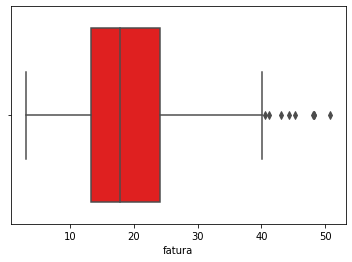

In [12]:
sns.boxplot(df.fatura,color="red");

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fatura,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
bahsis,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
grup,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [14]:
alt_sınır = Q1 - (1.5 * IQR)
ust_sınır = Q3 + (1.5 * IQR)
print("{} ==> alt sınır\n{} ==> ust sınır".format(alt_sınır,ust_sınır))

-2.8224999999999945 ==> alt sınır
40.29749999999999 ==> ust sınır


In [15]:
df[(df.fatura < alt_sınır)| (df.fatura > ust_sınır)]

,fatura,bahsis,cinsiyet,sigara,gun,zaman,grup
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [16]:
ort_fatura = df.fatura.mean()
ort_bahsis = df.bahsis.mean()
pd.DataFrame(data = (ort_fatura,ort_bahsis),columns = ["Ortalama"],index = ["Ortamala_Fatura","Ortalama_Bahsis"])

,Ortalama
Ortamala_Fatura,19.785943
Ortalama_Bahsis,2.998279


In [17]:
df.set_index("cinsiyet").head()

,fatura,bahsis,sigara,gun,zaman,grup
cinsiyet,,,,,,
Female,16.99,1.01,No,Sun,Dinner,2
Male,10.34,1.66,No,Sun,Dinner,3
Male,21.01,3.50,No,Sun,Dinner,3
Male,23.68,3.31,No,Sun,Dinner,2
Female,24.59,3.61,No,Sun,Dinner,4


In [18]:
df.groupby("gun")[["fatura","bahsis"]].sum()

,fatura,bahsis
gun,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


In [19]:
df.groupby("cinsiyet")[["fatura","bahsis"]].sum()

,fatura,bahsis
cinsiyet,,
Male,3256.82,485.07
Female,1570.95,246.51


In [20]:
df.groupby("sigara")[["fatura","bahsis"]].sum()

,fatura,bahsis
sigara,,
Yes,1930.34,279.81
No,2897.43,451.77


In [21]:
df.groupby("zaman")[["fatura","bahsis"]].sum()

,fatura,bahsis
zaman,,
Lunch,1167.47,185.51
Dinner,3660.30,546.07


In [22]:
df.groupby("grup")[["fatura","bahsis"]].mean()

,fatura,bahsis
grup,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


In [23]:
tablo = df[(df.fatura > ort_fatura) & (df.fatura > ort_bahsis) & 
           (df.cinsiyet == "Male") & (df.sigara == "No") & 
           (df.gun == "Sun") & (df.zaman == "Dinner") & (df.grup >= 4)]
tablo

,fatura,bahsis,cinsiyet,sigara,gun,zaman,grup
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
54,25.56,4.34,Male,No,Sun,Dinner,4
116,29.93,5.07,Male,No,Sun,Dinner,4
153,24.55,2.00,Male,No,Sun,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
160,21.50,3.50,Male,No,Sun,Dinner,4
167,31.71,4.50,Male,No,Sun,Dinner,4


In [24]:
tablo.index

Int64Index([5, 7, 44, 47, 54, 116, 153, 156, 160, 167, 185], dtype='int64')

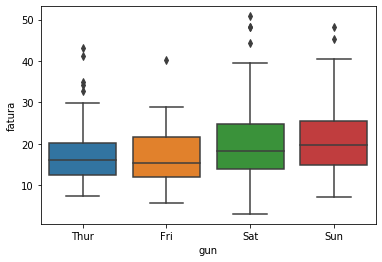

In [27]:
sns.boxplot(x = "gun",y = "fatura",data = df);

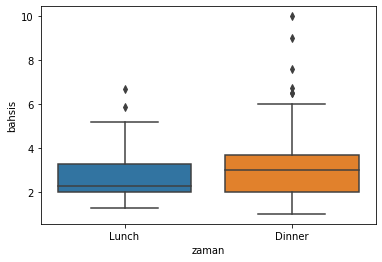

In [28]:
sns.boxplot(x = "zaman", y = "bahsis",data = df);

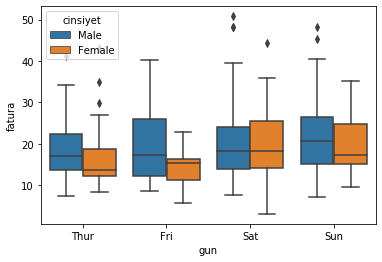

In [29]:
sns.boxplot(x = "gun",y = "fatura",hue = "cinsiyet",data = df);

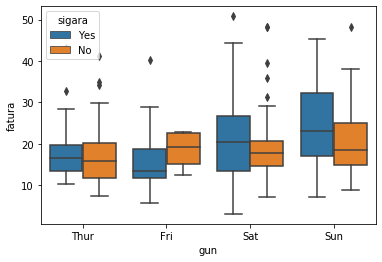

In [30]:
sns.boxplot(x = "gun",y = "fatura",hue = "sigara",data = df);

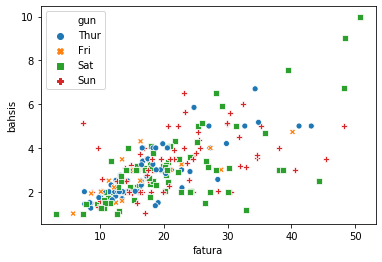

In [31]:
sns.scatterplot(x = "fatura",y = "bahsis",hue = "gun",style = "gun",data = df);

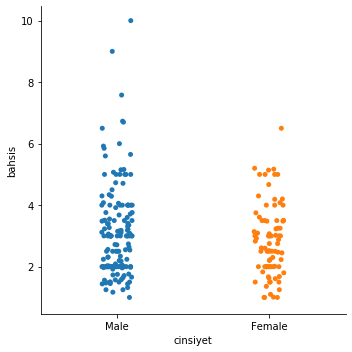

In [32]:
sns.catplot(x = "cinsiyet",y = "bahsis",data = df);

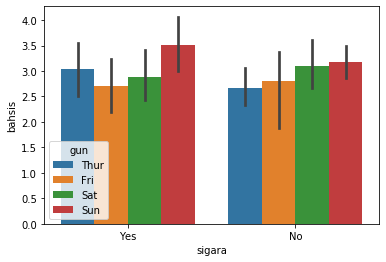

In [33]:
sns.barplot(x = "sigara",y = "bahsis",hue = "gun",data = df);

In [34]:
le = LabelEncoder()
le.fit_transform(df["cinsiyet"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [35]:
df["guncel_cinsiyet"] = le.fit_transform(df["cinsiyet"])
df.head()

,fatura,bahsis,cinsiyet,sigara,gun,zaman,grup,guncel_cinsiyet
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [36]:
pd.get_dummies(df,columns = ["sigara"],prefix = ["guncel"]).head()

,fatura,bahsis,cinsiyet,gun,zaman,grup,guncel_cinsiyet,guncel_Yes,guncel_No
0,16.99,1.01,Female,Sun,Dinner,2,0,0,1
1,10.34,1.66,Male,Sun,Dinner,3,1,0,1
2,21.01,3.50,Male,Sun,Dinner,3,1,0,1
3,23.68,3.31,Male,Sun,Dinner,2,1,0,1
4,24.59,3.61,Female,Sun,Dinner,4,0,0,1
